## Import Libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
titanic_df = pd.read_csv('titanic.csv')

In [111]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Moving the "Survived" Column to the End

For better organization, I moved the "Survived" column (the target variable) to the end of the DataFrame. This makes the dataset more visually appealing and easier to work with during model training.

In [112]:
survived_col = titanic_df.pop("Survived")
titanic_df['Survived'] = survived_col

In [113]:
titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Exploratory Data Analysis (EDA)

<div style="background-color: #f9f9f9; border: 1px solid #ddd; border-radius: 8px; padding: 15px; font-family: Arial, sans-serif; line-height: 1.6;">
<!--     <h2 style="color: #2c3e50; margin-top: 0;">Initial Exploration of the Dataset (EDA)</h2> -->
    <p style="margin: 10px 0;">To better understand the structure and contents of the Titanic dataset, I performed an initial exploratory data analysis (EDA). This step involves:</p>
    <ol style="margin: 10px 0 20px; padding-left: 20px;">
        <li><b>Using <code>.info()</code></b>: Provides an overview of the dataset, including column names, data types, and the number of non-null values.</li>
        <li><b>Checking the dataset size with <code>.shape</code></b>: Displays the number of rows and columns.</li>
        <li><b>Previewing the data with <code>.head()</code>, <code>.tail()</code>, and <code>.sample()</code></b>: Allows observation of individual records and identification of irregularities.</li>
        <li><b>Summarizing numerical columns with <code>.describe()</code></b>: Displays statistics such as mean, min, max, and standard deviation.</li>
        <li><b>Checking for missing values with <code>.isnull().sum()</code></b>: Identifies the extent of incomplete data in each column.</li>
        <li><b>Inspecting column data types with <code>.dtypes</code></b>: Ensures compatibility for further analysis.</li>
    </ol>
    <p style="margin: 10px 0;">These actions help identify data quality issues (e.g., missing values) and provide insights into the dataset's overall structure, preparing it for preprocessing and model training.</p>
</div>


In [114]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div style="background-color: #f9f9f9; border: 1px solid #ddd; border-radius: 8px; padding: 15px; font-family: Arial, sans-serif; line-height: 1.6;">
    <h2 style="color: #2c3e50; margin-top: 0;">Insights from <code>.info()</code> Method</h2>
    <p>The <code>.info()</code> method provides a summary of the Titanic dataset. Here’s what we learn from its output:</p>
    <ul style="margin: 10px 0 20px; padding-left: 20px;">
        <li><b>Number of Rows:</b> The dataset contains <b>891 rows</b>, indexed from <code>0</code> to <code>890</code>.</li>
        <li><b>Number of Columns:</b> There are <b>12 columns</b> in total.</li>
        <li><b>Column Details:</b> For each column, we see:
            <ul style="margin: 5px 0 10px; padding-left: 20px;">
                <li>Non-null counts: Columns like <code>Age</code> (714 non-null entries) and <code>Cabin</code> (204 non-null entries) have missing values.</li>
                <li>Data types: Columns are either <code>int64</code>, <code>float64</code>, or <code>object</code>.</li>
            </ul>
        </li>
        <li><b>Missing Data:</b> Significant missing values are found in:
            <ul style="margin: 5px 0 10px; padding-left: 20px;">
                <li><code>Age</code>: 177 missing values.</li>
                <li><code>Cabin</code>: 687 missing values (most of this column is missing).</li>
                <li><code>Embarked</code>: 2 missing values.</li>
            </ul>
        </li>
        <li><b>Memory Usage:</b> The dataset uses <b>83.7 KB</b> of memory.</li>
    </ul>
    <p><b>Key Takeaways:</b></p>
    <ul style="margin: 10px 0 0; padding-left: 20px;">
        <li>Columns like <code>Age</code>, <code>Cabin</code>, and <code>Embarked</code> will need preprocessing to handle missing data.</li>
        <li>Categorical columns (<code>Sex</code>, <code>Embarked</code>, etc.) may need encoding for machine learning models.</li>
        <li><code>Cabin</code> has a lot of missing values and might need to be dropped or imputed carefully.</li>
        <li>The <code>Survived</code> column has no missing values and is ready to be used as the target variable.</li>
    </ul>
</div>


<AxesSubplot:>

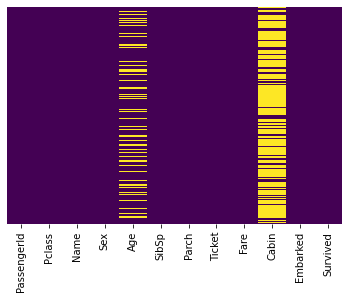

In [115]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [116]:
titanic_df.groupby('Cabin')['Survived'].mean()

Cabin
A10    0.0
A14    0.0
A16    1.0
A19    0.0
A20    1.0
      ... 
F33    1.0
F38    0.0
F4     1.0
G6     0.5
T      0.0
Name: Survived, Length: 147, dtype: float64

In [117]:
titanic_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [118]:
titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Data Cleaning

In [119]:
titanic_df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [120]:
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [121]:
titanic_df.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

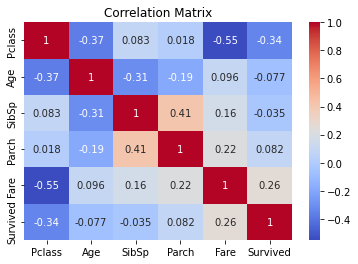

In [122]:
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [123]:
titanic_df.groupby(['Pclass'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


# Converting Categorical Features

In [125]:
sex_dummies = pd.get_dummies(titanic_df['Sex'], drop_first=True)
embarked_dummies = pd.get_dummies(titanic_df['Embarked'], drop_first=True, prefix='Embarked')

In [126]:
titanic_df = pd.concat([titanic_df, embarked_dummies, sex_dummies], axis=1)

In [127]:
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Embarked_Q,Embarked_S,male
0,3,male,22.0,1,0,7.2500,S,0,0,1,1
1,1,female,38.0,1,0,71.2833,C,1,0,0,0
2,3,female,26.0,0,0,7.9250,S,1,0,1,0
3,1,female,35.0,1,0,53.1000,S,1,0,1,0
4,3,male,35.0,0,0,8.0500,S,0,0,1,1


In [128]:
titanic_df.drop(['Embarked', 'Sex'], axis=1, inplace=True)

In [129]:
survived_col = titanic_df.pop("Survived")
titanic_df['Survived'] = survived_col

In [130]:
titanic_df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,male,Survived
0,3,22.0,1,0,7.2500,0,1,1,0
1,1,38.0,1,0,71.2833,0,0,0,1
2,3,26.0,0,0,7.9250,0,1,0,1
3,1,35.0,1,0,53.1000,0,1,0,1
4,3,35.0,0,0,8.0500,0,1,1,0


# Handling Null Values for Age 

### Approach 1: Imputation Based on Groups

In [131]:
titanic_imp = titanic_df.copy()

In [132]:
titanic_imp.groupby(['Pclass', 'male'])['Age'].mean()

Pclass  male
1       0       34.611765
        1       41.281386
2       0       28.722973
        1       30.740707
3       0       21.750000
        1       26.507589
Name: Age, dtype: float64

In [133]:
titanic_imp.groupby(['Pclass', 'male'])['Age'].median()

Pclass  male
1       0       35.0
        1       40.0
2       0       28.0
        1       30.0
3       0       21.5
        1       25.0
Name: Age, dtype: float64

In [134]:
titanic_imp['Age'] = titanic_imp.groupby(['Pclass', 'male'])['Age'].apply(lambda x: x.fillna(x.median()))

In [137]:
titanic_imp.dropna(inplace=True)

In [138]:
titanic_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Embarked_Q  891 non-null    uint8  
 6   Embarked_S  891 non-null    uint8  
 7   male        891 non-null    uint8  
 8   Survived    891 non-null    int64  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


### Approach 2: Predicting Missing Ages (Machine Learning Approach)

In [139]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
del titanic_pre, age_known, age_missing, features

In [243]:
titanic_pre = titanic_df.copy()

**Separate rows with and without missing values**

In [244]:
age_known = titanic_pre[titanic_pre['Age'].notnull()]

age_missing = titanic_pre[titanic_pre['Age'].isnull()]

**Train a model to predict age**

In [245]:
# features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'male']
features = ['Pclass', 'Fare', 'male']

In [246]:
age_model = RandomForestRegressor()

In [247]:
age_model.fit(age_known[features], age_known['Age'])

RandomForestRegressor()

**Predict missing ages**

In [248]:
predicted_ages = age_model.predict(age_missing[features])

In [249]:
titanic_pre.loc[age_missing.index, 'Age'] = predicted_ages

In [250]:
titanic_pre.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,male,Survived
0,3,22.0,1,0,7.2500,0,1,1,0
1,1,38.0,1,0,71.2833,0,0,0,1
2,3,26.0,0,0,7.9250,0,1,0,1
3,1,35.0,1,0,53.1000,0,1,0,1
4,3,35.0,0,0,8.0500,0,1,1,0


# Building Logistic Regression

## Using Imputed DataFrame

In [206]:
X = titanic_imp.drop('Survived',axis=1)

In [207]:
y = titanic_imp['Survived']

### Train Test Split

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X.shape

(891, 8)

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training and Prediction

In [215]:
from sklearn.linear_model import LogisticRegression

In [220]:
logmodel = LogisticRegression(max_iter=500)

In [240]:
logmodel.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=500)

In [218]:
from sklearn.preprocessing import StandardScaler

In [221]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [241]:
predictions = logmodel.predict(X_test_scaled)

## Evaluation

### Score

In [242]:
logmodel.score(X_test_scaled,y_test)

0.8212290502793296

<hr style="height:1px;border-width:0;color:black;background-color:black">

## Using Predicted Age DataSet

In [251]:
A = titanic_pre.drop('Survived',axis=1)
b = titanic_pre['Survived']

### Train Test Split

In [252]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

### Training and Prediction

In [253]:
logmodel_pre = LogisticRegression(max_iter=100)

In [254]:
A_train_scaled = scaler.fit_transform(A_train)
A_test_scaled = scaler.transform(A_test)

In [255]:
logmodel_pre.fit(A_train_scaled,b_train)

LogisticRegression()

In [256]:
predictions = logmodel.predict(A_test_scaled)

## Evaluation

### Score

In [257]:
logmodel.score(A_test_scaled,b_test)

0.8156424581005587